<img src="mmu_logo.png" style="height: 80px;" align=left> 

# Learning Objectives

Towards the end of this lesson, you should be able to:
- differentiate classification and regression tree
- program in CART using ``DecisionTreeClassifier``, ``DecisionTreeRegressor``
- program a SVM model


# Loading Libraries

In [1]:
# 31/10/22 - sambung buat part yg tak siap

# Load the relevant libraries

import pandas as pd
from sklearn import preprocessing # label encoding
from sklearn.tree import DecisionTreeClassifier  
from sklearn.tree import DecisionTreeRegressor  
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split # Import train_test_split functionn
from sklearn.metrics import accuracy_score
from sklearn import metrics
import sklearn.metrics as sm

from IPython.display import Image  
import matplotlib.pyplot as plt
from sklearn import tree

# Constructing a Decision Tree Classifier

you need to load ``from sklearn.tree import DecisionTreeClassifier``

In [2]:
# load diabetes.csv dataset

pima = pd.read_csv("diabetes.csv")
pima.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
# check the data types

pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
# the class variable must be categorical data. Take note of the change in data type for Outcome

pima.Outcome = pima['Outcome'].apply(str)

pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object

In [5]:
#split dataset in features and target variable*

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction'] 
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

In [6]:
# Split dataset into training set and test set
# 70-30 split and set random_state=1
# your codes here...

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [7]:
# Create Decision Tree classifer object and list all the default parameters

clf = DecisionTreeClassifier()
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [8]:
# Train Decision Tree Classifer using default parameters
# your codes here...
clf = clf.fit(X_train, y_train) # never say fit dataset in model, it should be - we fit model into dataset


# Predict the response for the test dataset
# your codes here...
y_pred = clf.predict(X_test)
y_pred

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1',
       '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1',
       '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1',
       '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0',
       '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0',
       '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0',
       '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0',
       '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0',
       '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1',
       '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1

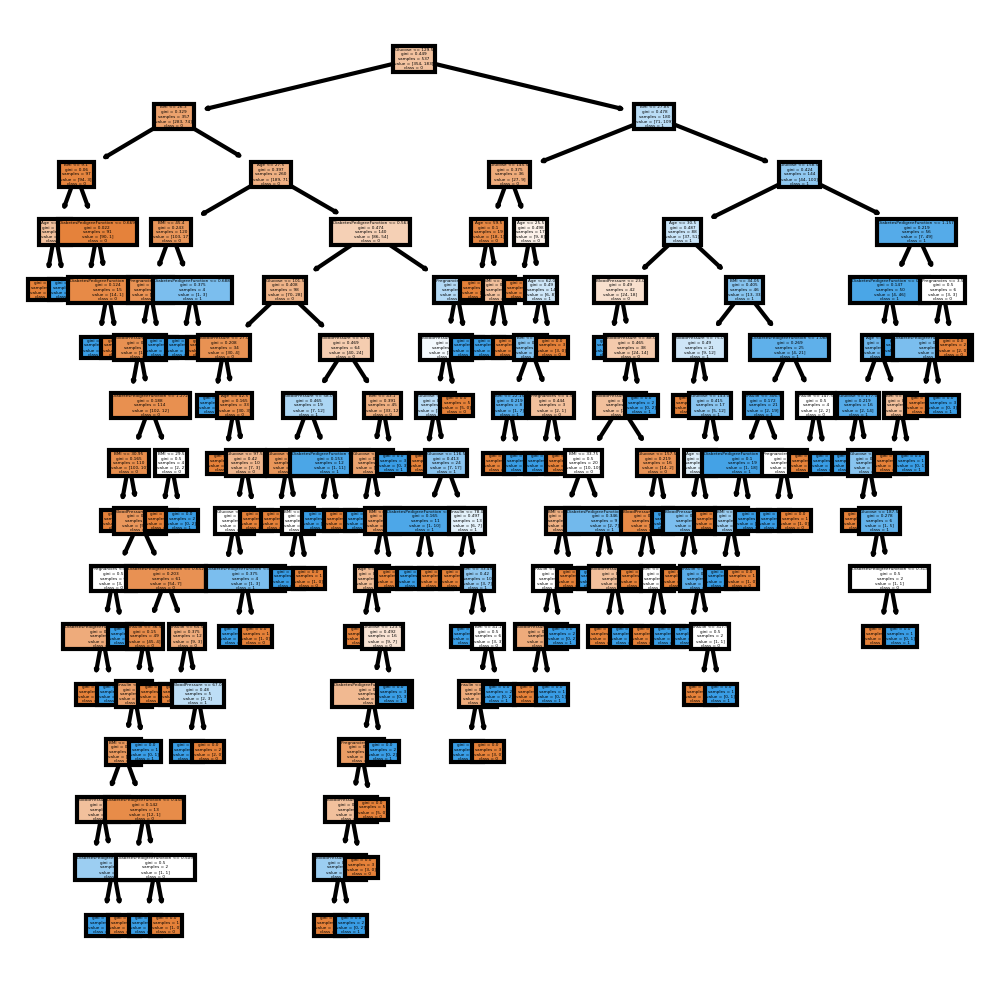

In [9]:
fn=X.columns
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

**NOTE:** the ``value`` represents the value for class 0 and 1, respectively

In the decision tree chart, each internal node has a decision rule that splits the data. Gini referred as Gini ratio, which measures the impurity of the node. You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.
Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning.

## Modifying the Decision Tree Parameters

Try change from ``Gini`` to ``Entropy``

In [10]:
# Create Decision Tree classifer object
# your codes here...
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2) # pruning
clf.get_params()

# Train Decision Tree Classifer*
# your codes here...
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset*
# your codes here...
y_pred = clf.predict(X_test)
y_pred

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1',
       '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1',
       '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0',
       '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0',
       '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1',
       '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0',
       '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1',
       '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0',
       '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1',
       '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1',
       '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0

In [11]:
# Model accuracy
# your codes here...
clf.score(X_test, y_test)

0.7705627705627706

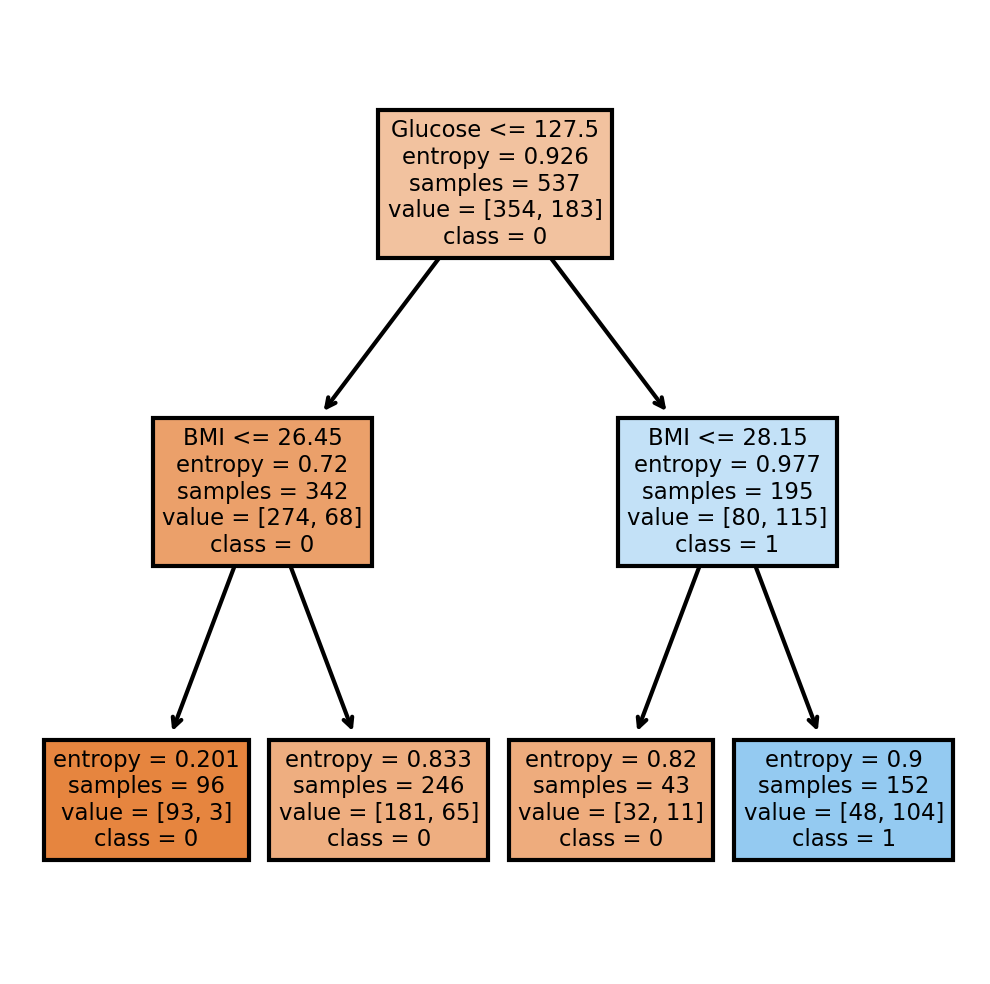

In [12]:
# Visualizing the decision-tree

fn=X.columns
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

Your task is the read the model generated above!

# Constructing a Regression Tree


In [2]:
# load petrol_consumption.csv dataset

dataset = pd.read_csv('petrol_consumption.csv')  
dataset.head()

Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410

In [3]:
# Prepare dataset X and y.

X = dataset.drop('Petrol_Consumption', axis=1)  
y = dataset['Petrol_Consumption']  

In [4]:
# split by 80-20, random_state=20
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20) # 20 here means seed generator for random

In [9]:
# create model using default hyperparameters
# your codes here...
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train) 

regressor1 = DecisionTreeRegressor(max_depth=3)
regressor1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [10]:
# your codes here...
y_pred = regressor.predict(X_test)

y_pred1 = regressor1.predict(X_test)

df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df  

Actual  Predicted
4      410      487.0
8      464      580.0
23     547      534.0
47     524      471.0
1      524      561.0
45     510      534.0
38     648      460.0
12     525      414.0
36     640      631.0
40     587      704.0

If MAE is less than 10 percent of the mean of all the values in the 'Petrol_Consumption' column. This means that our algorithm did a fine prediction job.

In [12]:
# your codes here...
print('Mean absolute error =', round(sm.mean_absolute_error(y_test, y_pred), 2))
print('Mean absolute error (max_depth=3) =', round(sm.mean_absolute_error(y_test, y_pred1), 2))

# not necessarily low depth will generate better result

# regressor means that it predicting numbers

Mean absolute error = 74.5
Mean absolute error (max_depth=3) = 54.27


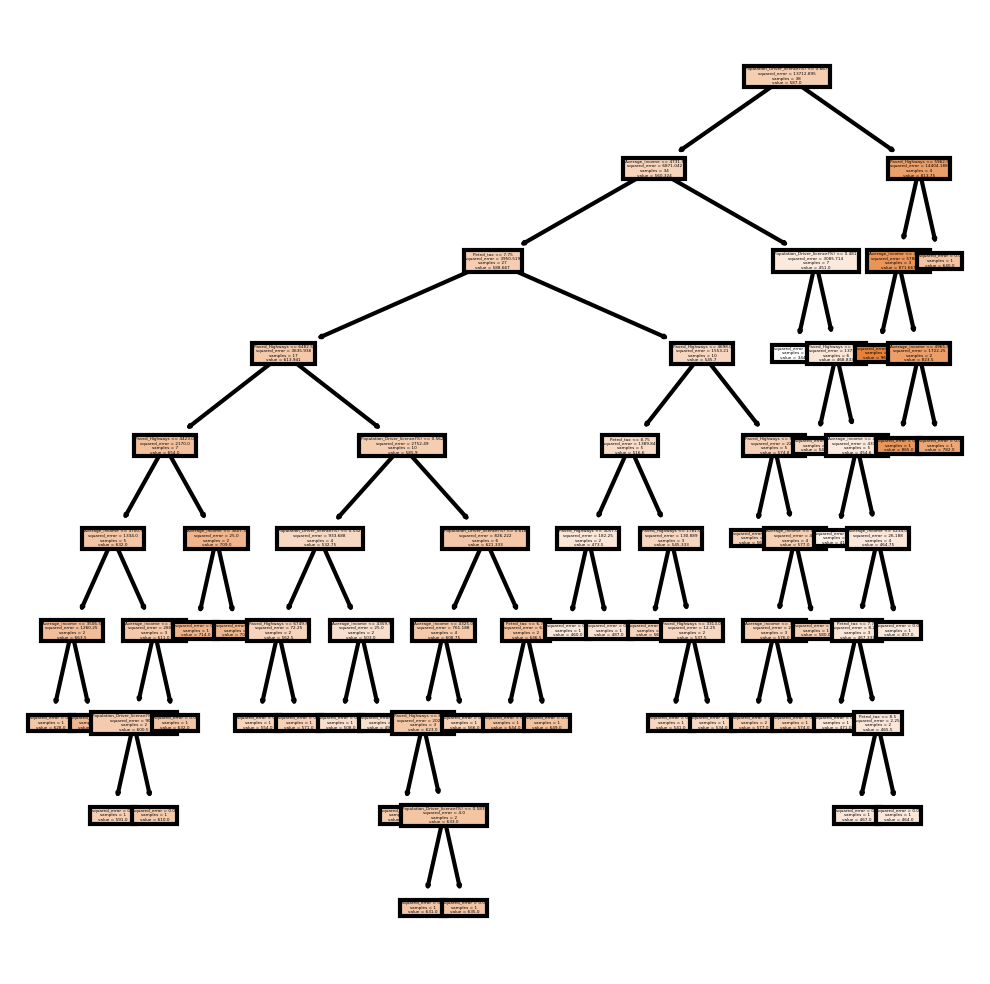

In [8]:
fn=X.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(regressor,
               feature_names = fn,  
               filled = True);
fig.savefig('imagename.png')

Add the max_depth to regressor --> regressor = DecisionTreeRegressor(max_depth=3). See the resulting tree! Check the MAE with this new model!

# Support Vector Machine (SVM)
SVM is particularly powerful and flexible class of supervised algorithms for both classification and regression. In this section, we will develop the intuition behind support vector machines and their use in classification problems.

## Load libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
%matplotlib inline

# SVM is accurate but need more computational power

In [14]:
# import the Iris dataset

iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target

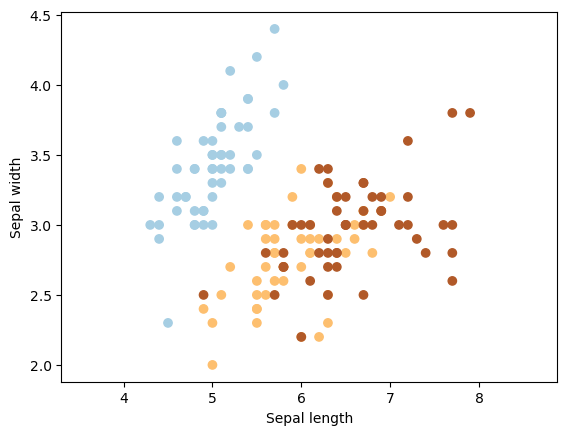

In [15]:
# Visualizing the data - only Sepal length and sepal width

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max()) 
plt.show()

In [16]:
def plotSVC(title):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    plt.show()



# Kernel
kernel parameters selects the type of hyperplane used to separate the data. Using ‘linear’ will use a linear hyperplane (a line in the case of 2D data). ‘rbf’ and ‘poly’ uses a non linear hyper-plane



In [17]:
kernels = ['linear', 'rbf', 'poly']

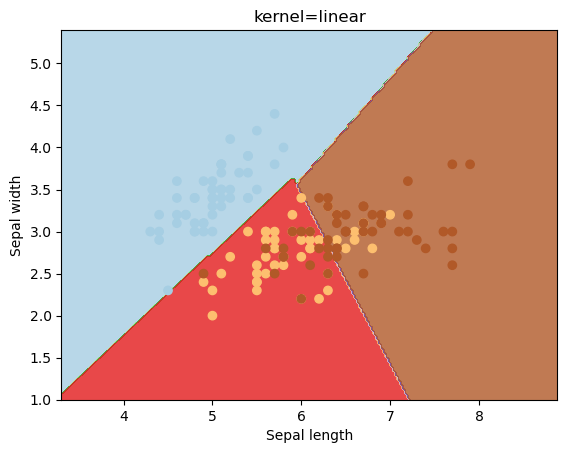

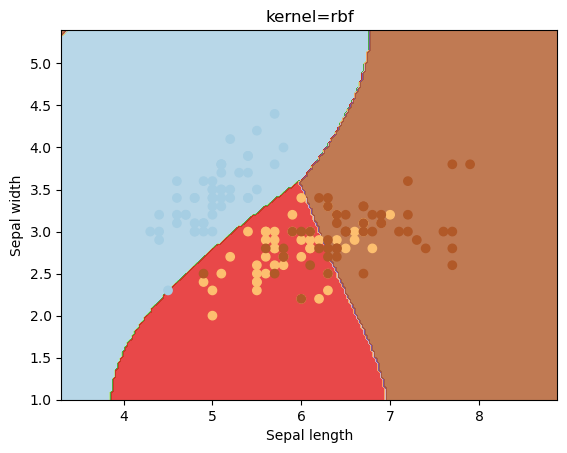

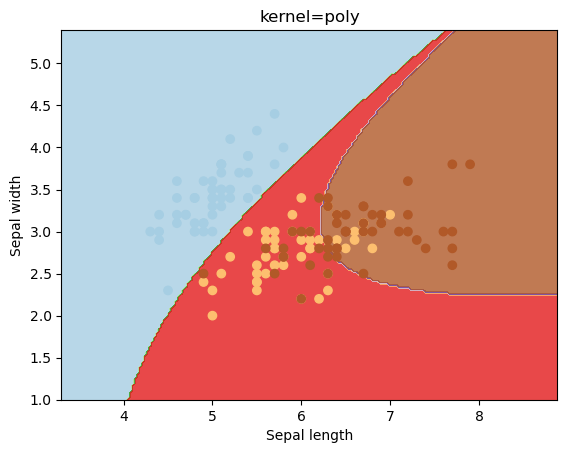

In [18]:
for kernel in kernels:
    svc = svm.SVC(kernel=kernel, gamma='auto').fit(X, y)
    plotSVC('kernel=' + str(kernel))

# gamma
gamma is a parameter for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set

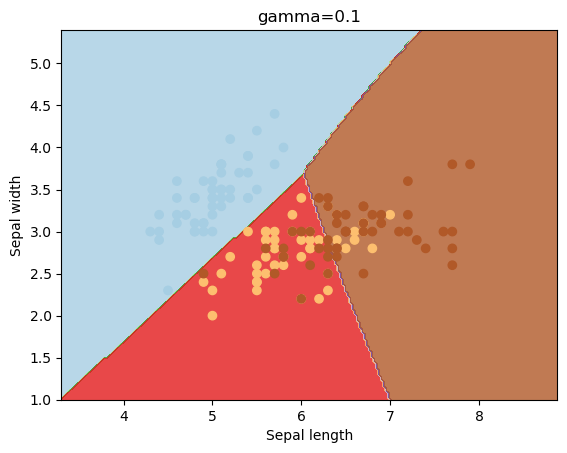

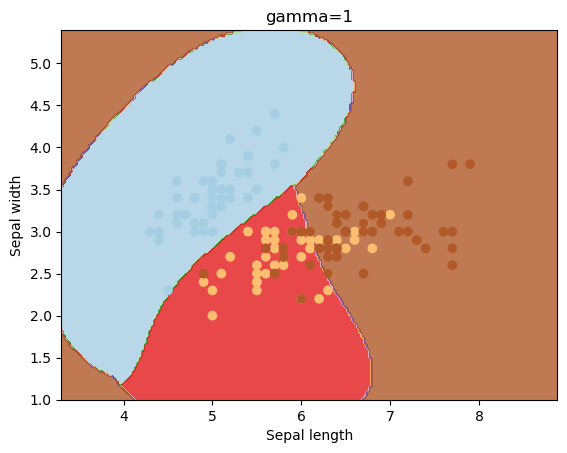

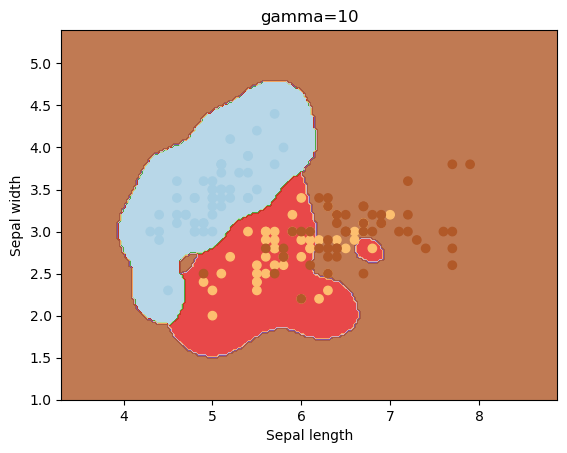

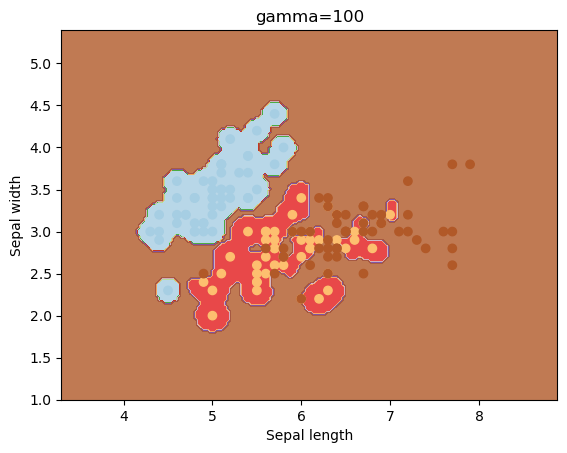

In [19]:
gammas = [0.1, 1, 10, 100]

for gamma in gammas:
    svc = svm.SVC(kernel='rbf', gamma=gamma).fit(X, y)
    plotSVC('gamma=' + str(gamma))


# C
C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

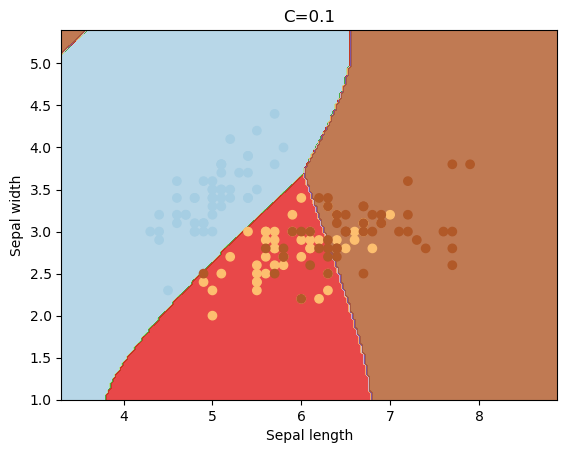

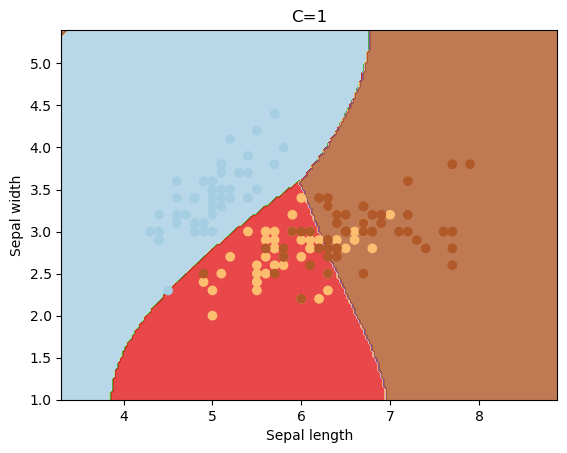

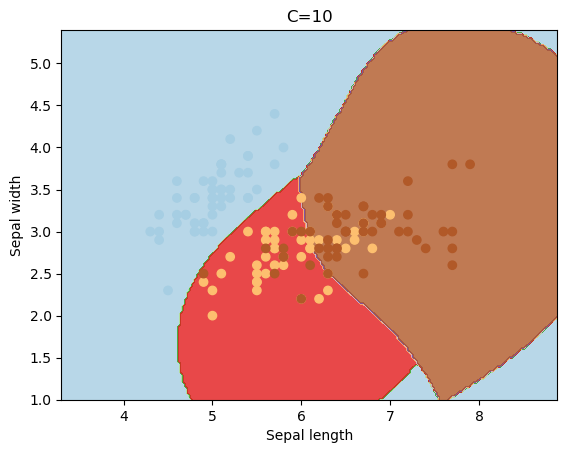

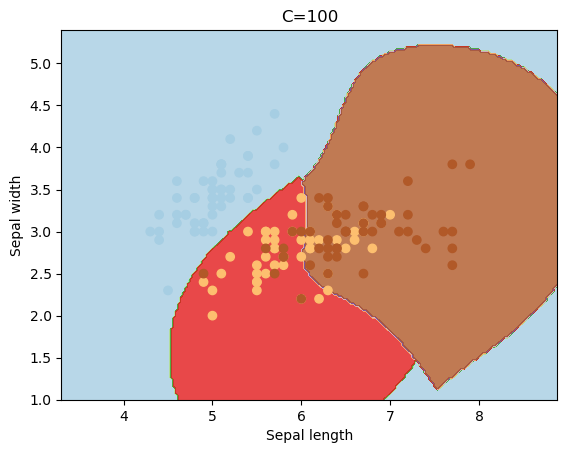

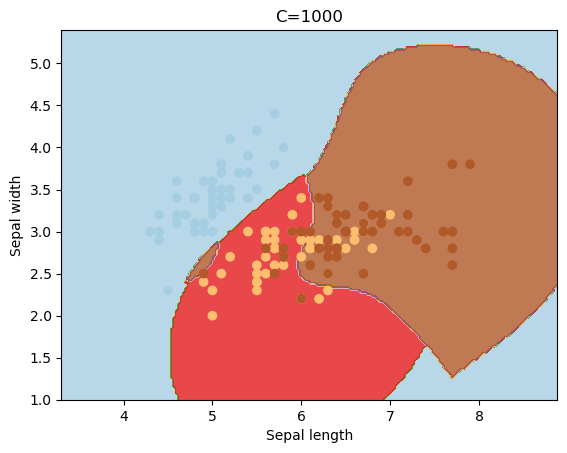

In [20]:
cs = [0.1, 1, 10, 100, 1000] # about the same with gamma??

for c in cs: 
    svc = svm.SVC(kernel='rbf', C=c, gamma ='auto').fit(X, y)
    plotSVC('C=' + str(c))

# degree

degree is a parameter used when kernel is set to ‘poly’. It’s basically the degree of the polynomial used to find the hyperplane to split the data.

Using degree=1 is the same as using a ‘linear’ kernel. Also, increasing this parameters leads to higher training times.

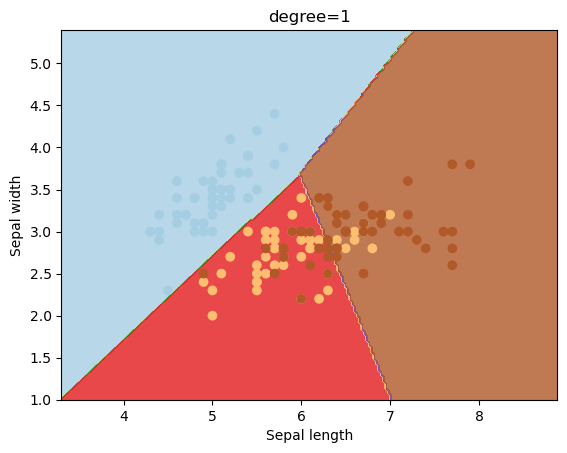

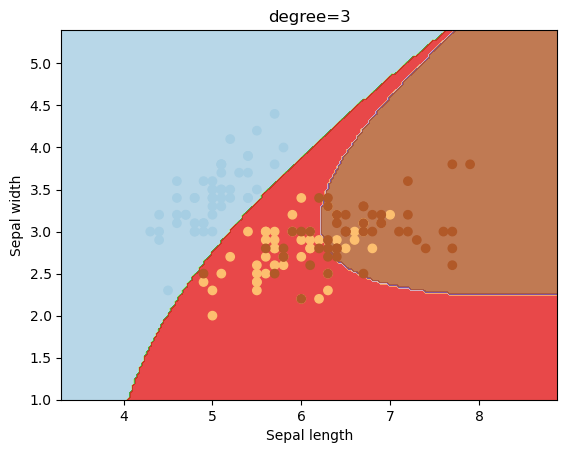

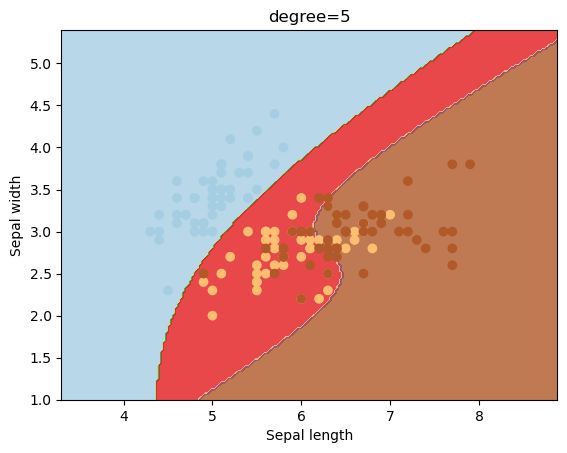

In [ ]:
from timeit import default_timer as timer
start = timer()

degrees = [1,3,5,7]

for degree in degrees:
    svc = svm.SVC(kernel='poly', degree=degree, gamma='auto').fit(X, y)
    plotSVC('degree=' + str(degree))
    
end = timer()

print('time spent =', end-start)

# Constructing a SVM Model


In [23]:
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

In [24]:
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


Let's explore it for a bit more. You can also check the shape of the dataset using shape.

In [25]:
cancer.data.shape

(569, 30)

In [26]:
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [27]:
# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [28]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [29]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
# your codes here...
clf = svm.SVC(kernel='linear', gamma='auto') # Linear Kernel

#Train the model using the training sets
# your codes here...
clf.fit(X_train, y_train)

#Predict the response for test dataset
# your codes here...
y_pred = clf.predict(X_test)

In [30]:
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [31]:
# Model Accuracy: how often is the classifier correct?

# your codes here...
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9649122807017544


In [33]:
# your codes here...
print("Precision: ", metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
# your codes here...
print("Recall: ", metrics.recall_score(y_test, y_pred))

Precision:  0.9811320754716981
Recall:  0.9629629629629629


## FINISH

### Your tasks 1:

1. Load the diabetes dataset
2. Perform classification on the dataset (select 100 rows, test size =0.2) and check the accuracy using:
    - kernel = rbf , linear , poly with degree=2 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

df = pd.read_csv('diabetes_data.csv')

# your codes here...

 

### Your tasks 2:

1. Load the banknote dataset
2. Perform classification on the dataset and check the accuracy using:
    - kernel = rbf , linear , poly with degree=2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

df = pd.read_csv('banknote.csv') 
X = df.drop("Class", axis=1)
y = df.Class

# your codes here...
